In [118]:
# importing necessary libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

This kernel analyis two datasets, energy csv and weather csv. first we perform explaratory data analsyis and then we clean it. the aim of is to predict electricity price per hour in spain using the previous data.

In [119]:
# loading the datset
energy_df = pd.read_csv('energy_dataset.csv')
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [120]:
# displaying from the 10th column and the first 10 rows

m_columns = energy_df.columns[9::]

clmns = energy_df.iloc[:10][m_columns]
clmns

,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,0.0,NaN,2109.0,952.0,743.0,0.0,7098.0,43.0,74.0,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,0.0,NaN,2108.0,961.0,848.0,0.0,7098.0,43.0,74.0,34.0,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,0.0,NaN,2031.0,983.0,1012.0,0.0,7099.0,43.0,72.0,35.0,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,0.0,NaN,2119.0,1001.0,1015.0,0.0,7098.0,43.0,73.0,54.0,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,0.0,NaN,2170.0,1041.0,1357.0,0.0,7097.0,43.0,74.0,743.0,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [121]:
# dropping columns that we wont be using

energy_df = energy_df.drop(['generation fossil coal-derived gas', 'generation fossil oil shale',
                'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated',
                'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead'],
                          axis = 1)

In [122]:
energy_df.shape

(35064, 21)

In [123]:
energy_df.describe(). round(3)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000,35046.000,35046.000,35046.000,35045.000,35045.000,35045.000,35046.000,35047.000,35046.000,35046.000,35046.000,35045.000,35046.000,35064.000,35064.000,35064.000,35028.000,35064.000,35064.000
mean,383.514,448.059,5622.737,4256.066,298.320,475.577,972.116,2605.115,6263.907,60.229,85.640,1432.666,269.452,5464.480,1439.067,5471.217,28712.130,28696.940,49.874,57.884
std,85.354,354.569,2201.830,1961.601,52.521,792.407,400.778,1835.200,839.668,20.238,14.078,1680.120,50.196,3213.692,1677.703,3176.313,4594.101,4574.988,14.619,14.204
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,237.000,18105.000,18041.000,2.060,9.330
25%,333.000,0.000,4126.000,2527.000,263.000,0.000,637.000,1077.250,5760.000,53.000,73.000,71.000,240.000,2933.000,69.000,2979.000,24793.750,24807.750,41.490,49.348
50%,367.000,509.000,4969.000,4474.000,300.000,68.000,906.000,2164.000,6566.000,57.000,88.000,616.000,279.000,4849.000,576.000,4855.000,28906.000,28901.000,50.520,58.020
75%,433.000,757.000,6429.000,5838.750,330.000,616.000,1250.000,3757.000,7025.000,80.000,97.000,2578.000,310.000,7398.000,2636.000,7353.000,32263.250,32192.000,60.530,68.010
max,592.000,999.000,20034.000,8359.000,449.000,4523.000,2000.000,9728.000,7117.000,106.000,119.000,5792.000,357.000,17436.000,5836.000,17430.000,41390.000,41015.000,101.990,116.800


In [124]:
# checking for null values 

energy_df.isna().sum().sort_values(ascending = False)

total load actual                              36
generation biomass                             19
generation waste                               19
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation wind onshore                        18
generation solar                               18
generation other renewable                     18
generation other                               18
generation fossil hard coal                    18
generation fossil gas                          18
generation fossil brown coal/lignite           18
generation hydro water reservoir               18
generation nuclear                             17
total load forecast                             0
price day ahead                                 0
time                                            0
forecast wind onshore day ahead                 0
forecast solar day ahead                        0


In [125]:
# checking for duplicates

duplicates = energy_df.duplicated(keep= 'last').sum()
print(f'There are {duplicates} duplicates in the columns')

There are 0 duplicates in the columns


In [126]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [127]:
# converting the time column to date time

energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)

In [128]:
energy_df['time'].dtype

datetime64[ns, UTC]

In [129]:
energy_df = energy_df.rename(columns = {'time':'Time'})
energy_df

,Time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [130]:
# setting time as index
energy_df = energy_df.set_index('Time')

In [131]:
# defining a function that plots a time series.

def time_series(df = None, column = None, ylabel = None, title = None, start = None, 
                end = None, label = None, series = pd.Series([]) ):

    sns.set()
    fig, ax = plt.subplots(figsize = (30, 12))
    ax.set_xlabel('Time', fontsize = 14)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize = 14)
    if series.any():
        ax.plot(series, label = label)
        ax.set_ylabel(ylabel, fontsize = 14)
    if label:
        ax.legend(fontsize = 14)
    if title:
        ax.set_title(title, fontsize = 22)
    ax.grid(True)
    return ax
    

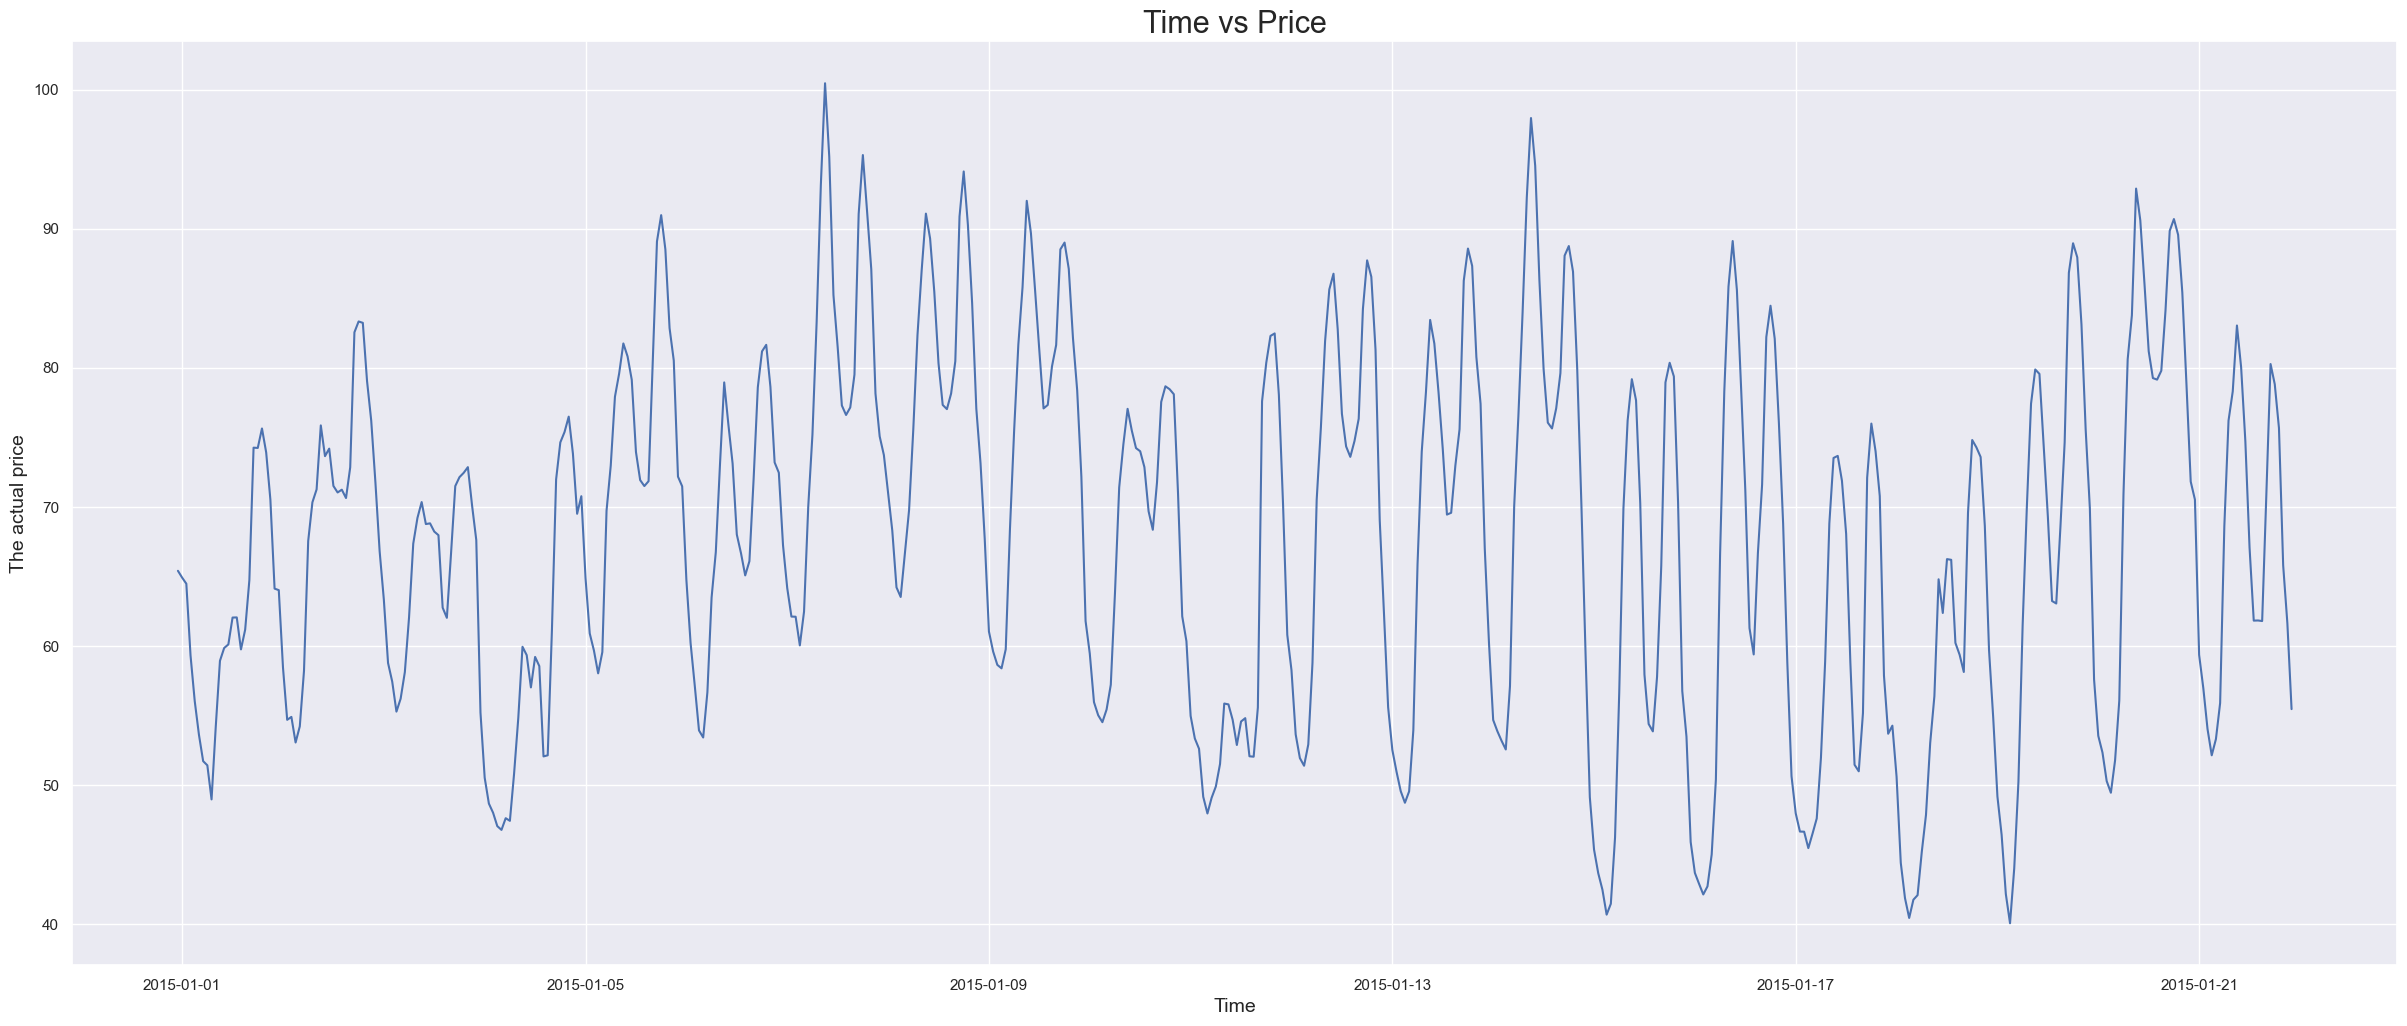

In [132]:
# plotting the hourly (actual) price

time_plot = time_series(df = energy_df, column = 'price actual', 
                        ylabel = 'The actual price', title = 'Time vs Price',
                       end = 24*7*3)

plt.show()

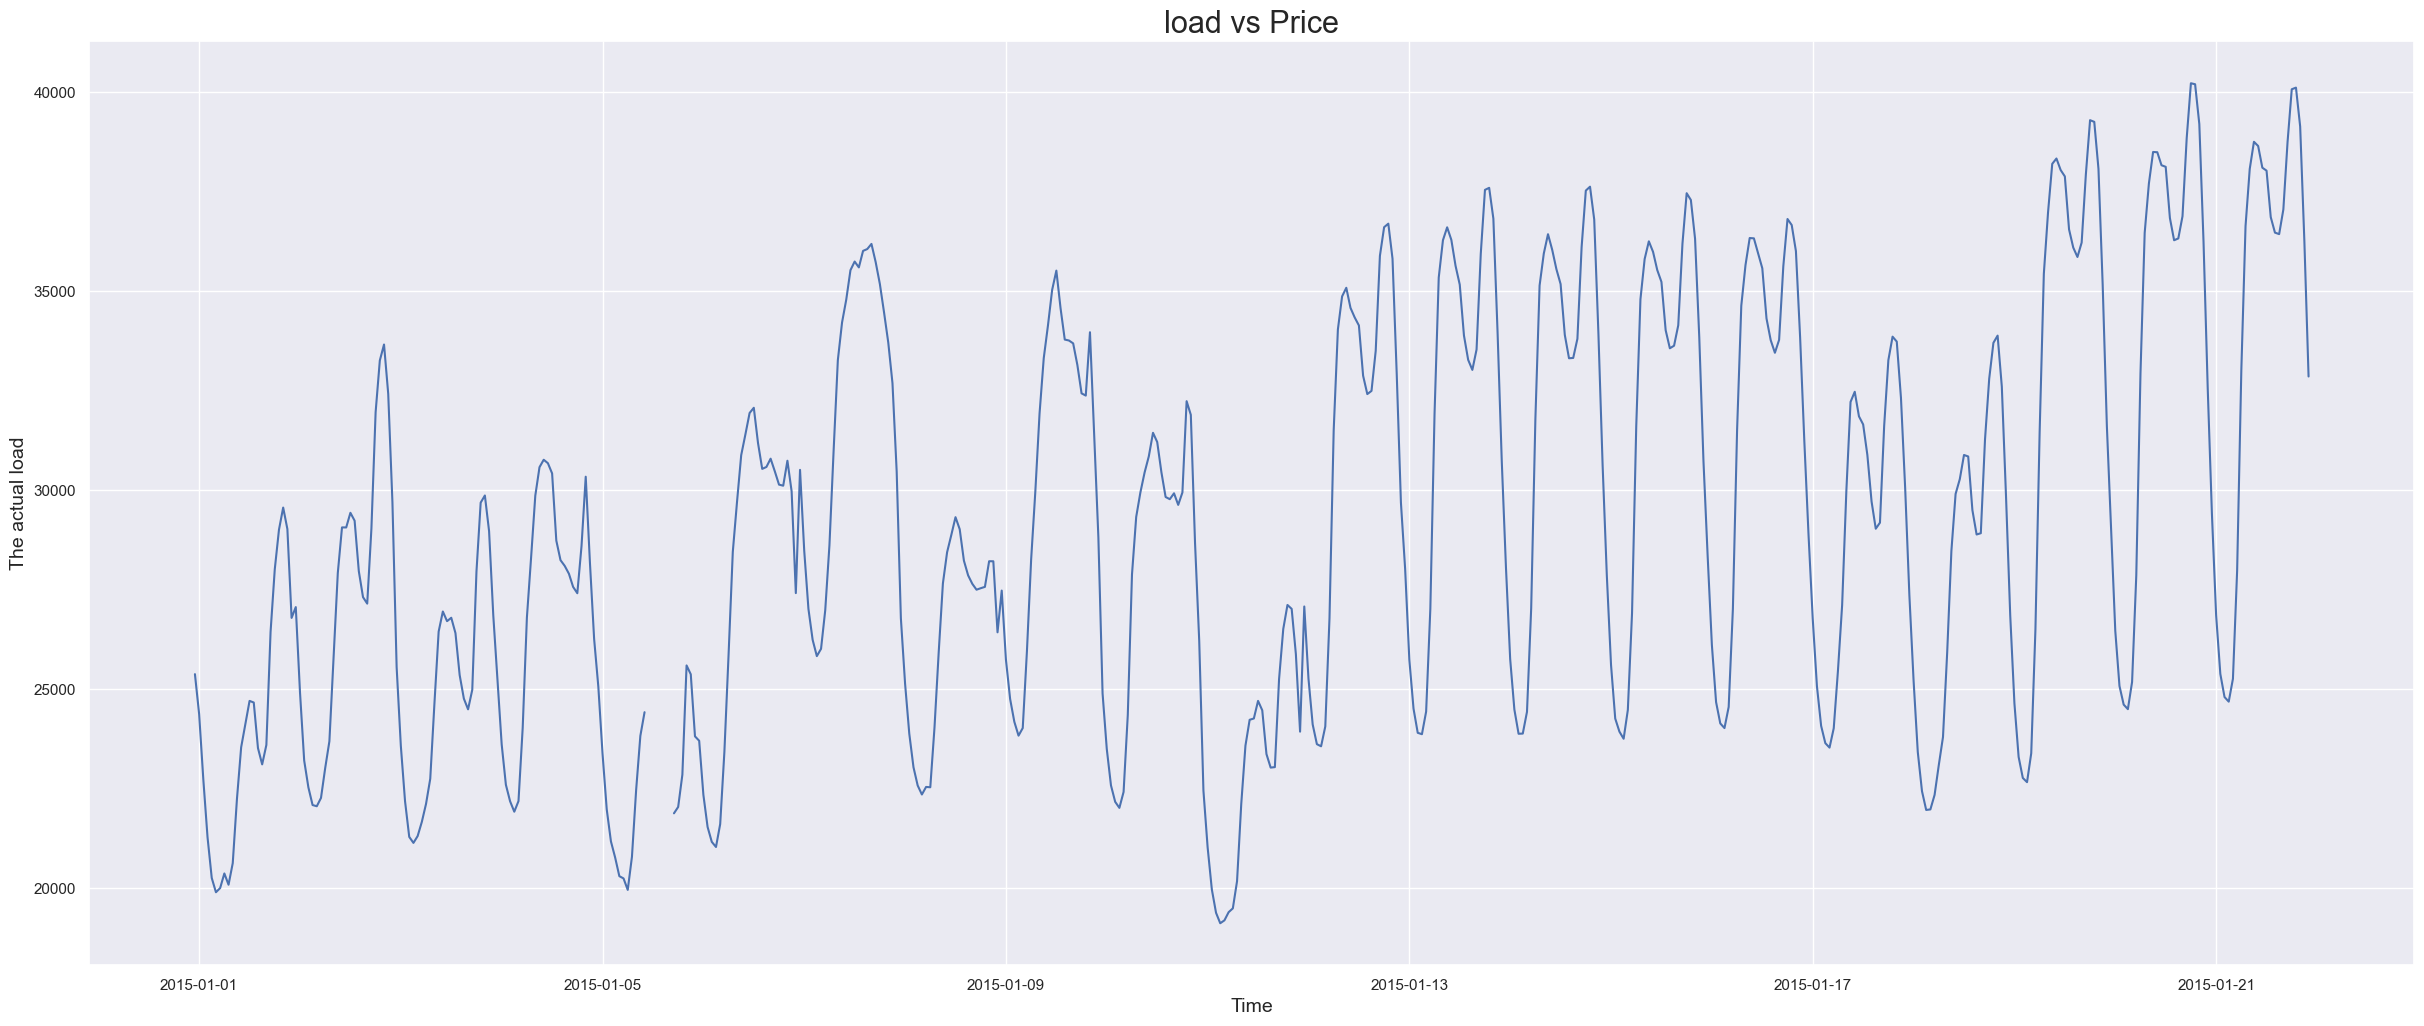

In [133]:
# plotting the hourly actual total load
time_plot = time_series(df = energy_df, column = 'total load actual', 
                        ylabel = 'The actual load', title = 'load vs Price',
                       end = 24*7*3)

plt.show()

In [134]:
energy_df[energy_df['total load actual'].isnull()]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
Time,,,,,,,,,,,,,,,,,,,,
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-28 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4136.0,6223.0,36239.0,NaN,65.00,77.62
2015-02-01 06:00:00+00:00,449.0,312.0,4765.0,5269.0,222.0,480.0,980.0,1174.0,7101.0,44.0,75.0,48.0,208.0,3289.0,18.0,3141.0,24379.0,NaN,56.10,16.98
2015-02-01 07:00:00+00:00,453.0,312.0,4938.0,5652.0,288.0,0.0,1031.0,3229.0,7099.0,44.0,75.0,73.0,207.0,3102.0,63.0,3165.0,27389.0,NaN,57.69,19.56


In [135]:
energy_df[energy_df.isnull().any(axis=1)].tail()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
Time,,,,,,,,,,,,,,,,,,,,
2016-11-23 03:00:00+00:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,3.0,4566.0,23469.0,23112.0,43.19,49.11
2017-11-14 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4325.0,7561.0,33805.0,NaN,60.53,66.17
2017-11-14 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5679.0,35592.0,NaN,68.05,75.45
2018-06-11 16:00:00+00:00,331.0,506.0,7538.0,5360.0,300.0,1.0,1134.0,4258.0,5856.0,52.0,96.0,170.0,269.0,9165.0,125.0,10329.0,34752.0,NaN,69.87,64.93
2018-07-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,849.0,9956.0,33938.0,NaN,63.01,69.79


We can see that the null values in the total load actual coincide with the null values from the other columns. in this case to deal with the null values we will using the linear interpolation.

In [136]:
# filling the null values using linear interpolation

energy_df.interpolate(method='linear', limit_direction='forward',
                inplace=True, axis=0)

In [137]:

energy_df.isna().sum().sort_values(ascending = False)

generation biomass                             0
generation fossil brown coal/lignite           0
price day ahead                                0
total load actual                              0
total load forecast                            0
forecast wind onshore day ahead                0
forecast solar day ahead                       0
generation wind onshore                        0
generation waste                               0
generation solar                               0
generation other renewable                     0
generation other                               0
generation nuclear                             0
generation hydro water reservoir               0
generation hydro run-of-river and poundage     0
generation hydro pumped storage consumption    0
generation fossil oil                          0
generation fossil hard coal                    0
generation fossil gas                          0
price actual                                   0
dtype: int64

In [138]:
# checking for non zero values

print('Non-zero values in each column:\n', energy_df.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
forecast solar day ahead                       34525
forecast wind onshore day ahead                35064
total load forecast                            35064
total load actual                              35064
price day ahe

we have cleaned the energy_df succesfully and some columns might suspicious but we should keep in mind that some of the are the forecast and the (generation hydro pumped storage consumption) is the reserved energy only used during shortages and when there is high energy demand. The other colums that vary from 1-4 shouldnt be a worry because it differe with the type of the energy. 



Loading the weather dataset and preprocessing it

In [139]:
# loading the weather datsaset
weather_df = pd.read_csv('weather_features.csv')
weather_df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [140]:
# checking for null values
weather_df.isna().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [141]:
# checking for duplicates, keeping the first row

duplicate_ = weather_df.duplicated(keep = 'first').sum()
print(f'There are {duplicate_} duplicates')

There are 21 duplicates


In [142]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [143]:
weather_df.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [144]:
# converting the dt_iso column from object to datetime

weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc = True)

In [145]:
weather_df.shape

(178396, 17)

In [146]:
weather_df.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [147]:
weather_df['Time'] = weather_df['dt_iso']
weather_df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,Time
0,2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2014-12-31 23:00:00+00:00
1,2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 00:00:00+00:00
2,2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 01:00:00+00:00
3,2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 02:00:00+00:00
4,2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 03:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 18:00:00+00:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2018-12-31 18:00:00+00:00
178392,2018-12-31 19:00:00+00:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2018-12-31 19:00:00+00:00
178393,2018-12-31 20:00:00+00:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2018-12-31 20:00:00+00:00
178394,2018-12-31 21:00:00+00:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2018-12-31 21:00:00+00:00


In [148]:
# setting the time column to index and dropping dt_iso

weather_df = weather_df.drop(['dt_iso'], axis = 1)
weather_df = weather_df.set_index('Time')
weather_df

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
Time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 19:00:00+00:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 20:00:00+00:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [149]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  object 
 14  weather_description  1

In [150]:
# checking the number of rows in the dataframes 

print('There are {} number of rows in energy_df.'.format(energy_df.shape[0]))

cities = weather_df['city_name'].unique()
weather_grouped = weather_df.groupby('city_name')

for city in cities:
    num_observations = weather_grouped.get_group(city).shape[0]
    print(f'there are {num_observations} rows in weather_df about city: {city}')

There are 35064 number of rows in energy_df.
there are 35145 rows in weather_df about city: Valencia
there are 36267 rows in weather_df about city: Madrid
there are 35951 rows in weather_df about city: Bilbao
there are 35476 rows in weather_df about city:  Barcelona
there are 35557 rows in weather_df about city: Seville


In [151]:
# dropping the duplicates in the dataset and creating another dataframe
weather_df2 = weather_df. reset_index().drop_duplicates(subset = ['Time',
                                    'city_name'], keep = 'first').set_index('Time')

weather_df = weather_df. reset_index().drop_duplicates(subset = ['Time',
                                    'city_name'], keep = 'last').set_index('Time')


In [152]:
# checking for the number of rows again after dropping the duplicates 

print('There are {} number of rows in energy_df.'.format(energy_df.shape[0]))

cities = weather_df['city_name'].unique()
weather_grouped = weather_df.groupby('city_name')

for city in cities:
    num_observations = weather_grouped.get_group(city).shape[0]
    print(f'There are {num_observations} number of rows in weather_df about city: {city}')
    

There are 35064 number of rows in energy_df.
There are 35064 number of rows in weather_df about city: Valencia
There are 35064 number of rows in weather_df about city: Madrid
There are 35064 number of rows in weather_df about city: Bilbao
There are 35064 number of rows in weather_df about city:  Barcelona
There are 35064 number of rows in weather_df about city: Seville


In this next step we are going to drop the columns we wont be using in our analysis, but first we need to check the unique values in some of the columns. (weather_main), ('weather_id') and (weather_description) gives the same information about the weather description, therefore we need to choose one based on the reliablity and consistency of the information. 

In [153]:
weather_df['weather_main'].unique()

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [154]:
weather_df['weather_id'].unique()

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 601,
       615, 210, 616, 602, 611, 311, 612, 620, 531, 731, 761, 771])

In [155]:
weather_df['weather_description'].unique()


array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'proximity thunderstorm', 'thunderstorm',
       'light intensity shower rain', 'light intensity drizzle', 'fog',
       'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light intensity drizzle rain',
       'light snow', 'snow', 'light rain and snow', 'light thunderstorm',
       'rain and snow', 'heavy snow', 'sleet', 'rain and drizzle',
       'shower sleet', 'light shower sleet', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain',
       'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
      dtype=object)

We can see that (weather_main) gives less descriptive information while (weather_description) and (weather_id) gives more detailed description and has aproxiametly the same number of unique values. Therefore, will be using the two dataframes (weather_df) and (weather_df2) to check the consistency of the data by employing R2 metric; this is after we've encoded (weather_description) and (weather_main)

In [156]:
# defining a function that will encode and calculates r2 score of the same column in the two dataframe. 

def encode_calculate_r2_score(df1, df2, column, categorical = False):
    dataframes = [df1, df2]
    if categorical:
        for df in dataframes:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
        r2 = r2_score(df1[column], df2[column])
        print(f"R-Squared score of {column} is {r2.round(3)}.")
    else:
        for df in dataframes:
            one_hot_encoded = pd.get_dummies(df[column])
            r2 = r2_score(df1[column], df2[column])
            print(f"R-Squared score of {column} is {r2.round(3)}")



In [157]:
# displaying the r2 score of the weather description columns in both the dataframes. 

encode_calculate_r2_score(weather_df, weather_df2, 'weather_main', categorical=True )
encode_calculate_r2_score(weather_df, weather_df2, 'weather_description', categorical=True)
encode_calculate_r2_score(weather_df, weather_df2, 'weather_id')

R-Squared score of weather_main is 0.962.
R-Squared score of weather_description is 0.976.
R-Squared score of weather_id is 0.92
R-Squared score of weather_id is 0.92


In [158]:
# checking the r2 score of the othjer columns in both the dataframes afer encoding

weather_df_columns = weather_df.columns.drop('city_name')

for col in weather_df_columns:
    encode_calculate_r2_score(weather_df, weather_df2, col, categorical=True)

R-Squared score of temp is 1.0.
R-Squared score of temp_min is 1.0.
R-Squared score of temp_max is 1.0.
R-Squared score of pressure is 1.0.
R-Squared score of humidity is 1.0.
R-Squared score of wind_speed is 1.0.
R-Squared score of wind_deg is 1.0.
R-Squared score of rain_1h is 1.0.
R-Squared score of rain_3h is 1.0.
R-Squared score of snow_3h is 1.0.
R-Squared score of clouds_all is 1.0.
R-Squared score of weather_id is 0.945.
R-Squared score of weather_main is 0.962.
R-Squared score of weather_description is 0.976.
R-Squared score of weather_icon is 0.986.


In [159]:
# dropping the weather description columns
weather_df = weather_df.drop(['weather_icon', 'weather_description', 
                            'weather_main', 'weather_id'], axis = 1)

The r2 score above looks great and the two datasets we used were cleaned differently when removing thr duplicates by keeping the first and the last rows of the duplicates per dataframe. 

In [160]:
# checking number of duplicates in weather_df

df_duplicates = weather_df.reset_index().duplicated(subset = ['Time', 
                                            'city_name'],keep = 'last').sum()

print(f'''There are {df_duplicates} number of duplicates rows based on all columns
    expect the time and city_name colum''')

There are 0 number of duplicates rows based on all columns
    expect the time and city_name colum


checking for with outliers then replacing them with NaN values, if there is any then using linear interpolation to replace the values

In [161]:
# defining a function that plots a box plot, given a df and a column
def checking_outliers(df, column):
    ss = sns.boxplot(x = df[column])
    return ss


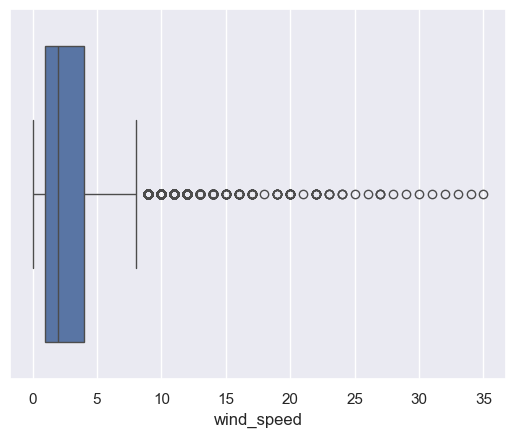

In [162]:
# checking for the outliers using box plot in the preasure column weather_df
checking_outliers(weather_df, 'wind_speed')
plt.show()

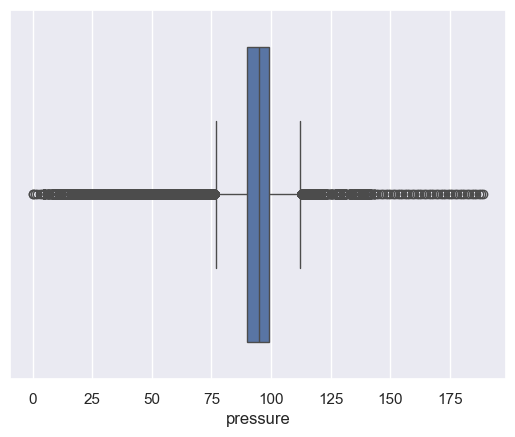

In [163]:
checking_outliers(weather_df, 'pressure')
plt.show()

In [164]:
# replacing the outliers with NaN values 
weather_df.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
count,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000
mean,12238.063741,10721.307649,12259.454517,93.189225,67.032666,2.468817,166.724909,0.246943,0.366484,0.047182,23.498791
std,5596.622329,5521.777084,5264.959605,12.374982,21.836986,2.062194,116.548788,0.791040,4.540571,1.389753,29.543602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7668.000000,5992.750000,8287.750000,90.000000,52.000000,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000
50%,13243.000000,11769.000000,13448.000000,95.000000,71.000000,2.000000,178.000000,0.000000,0.000000,0.000000,15.000000
75%,17153.000000,15928.000000,17005.000000,99.000000,86.000000,4.000000,270.000000,0.000000,0.000000,0.000000,38.000000
max,20742.000000,18552.000000,18590.000000,189.000000,99.000000,35.000000,360.000000,6.000000,88.000000,65.000000,96.000000


regarding the two columns that had outliers before cleaning, everything loks nice and clean and we are ready to merge the two datasets. the maximum windspeed for instance was 133 which is higher that wind speed of a tornado, considering when the last tornado was recorded in spain. 

In [181]:
# merging the two datasets
final_df = energy_df.merge(weather_df, on = ['Time'], how = 'outer')
final_df.head(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
Time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,170,167,78,76,1,62,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,30,26,48,62,1,309,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,117,113,113,96,0,226,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,4900,4889,112,99,7,58,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,518,514,116,74,1,21,0,0,0,0


In [198]:
final_df.isna().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
city_name           

In [199]:
f_duplicates = final_df.duplicated(keep = 'last').sum()
print(f'{f_duplicates} number of duplicates')

0 number of duplicates


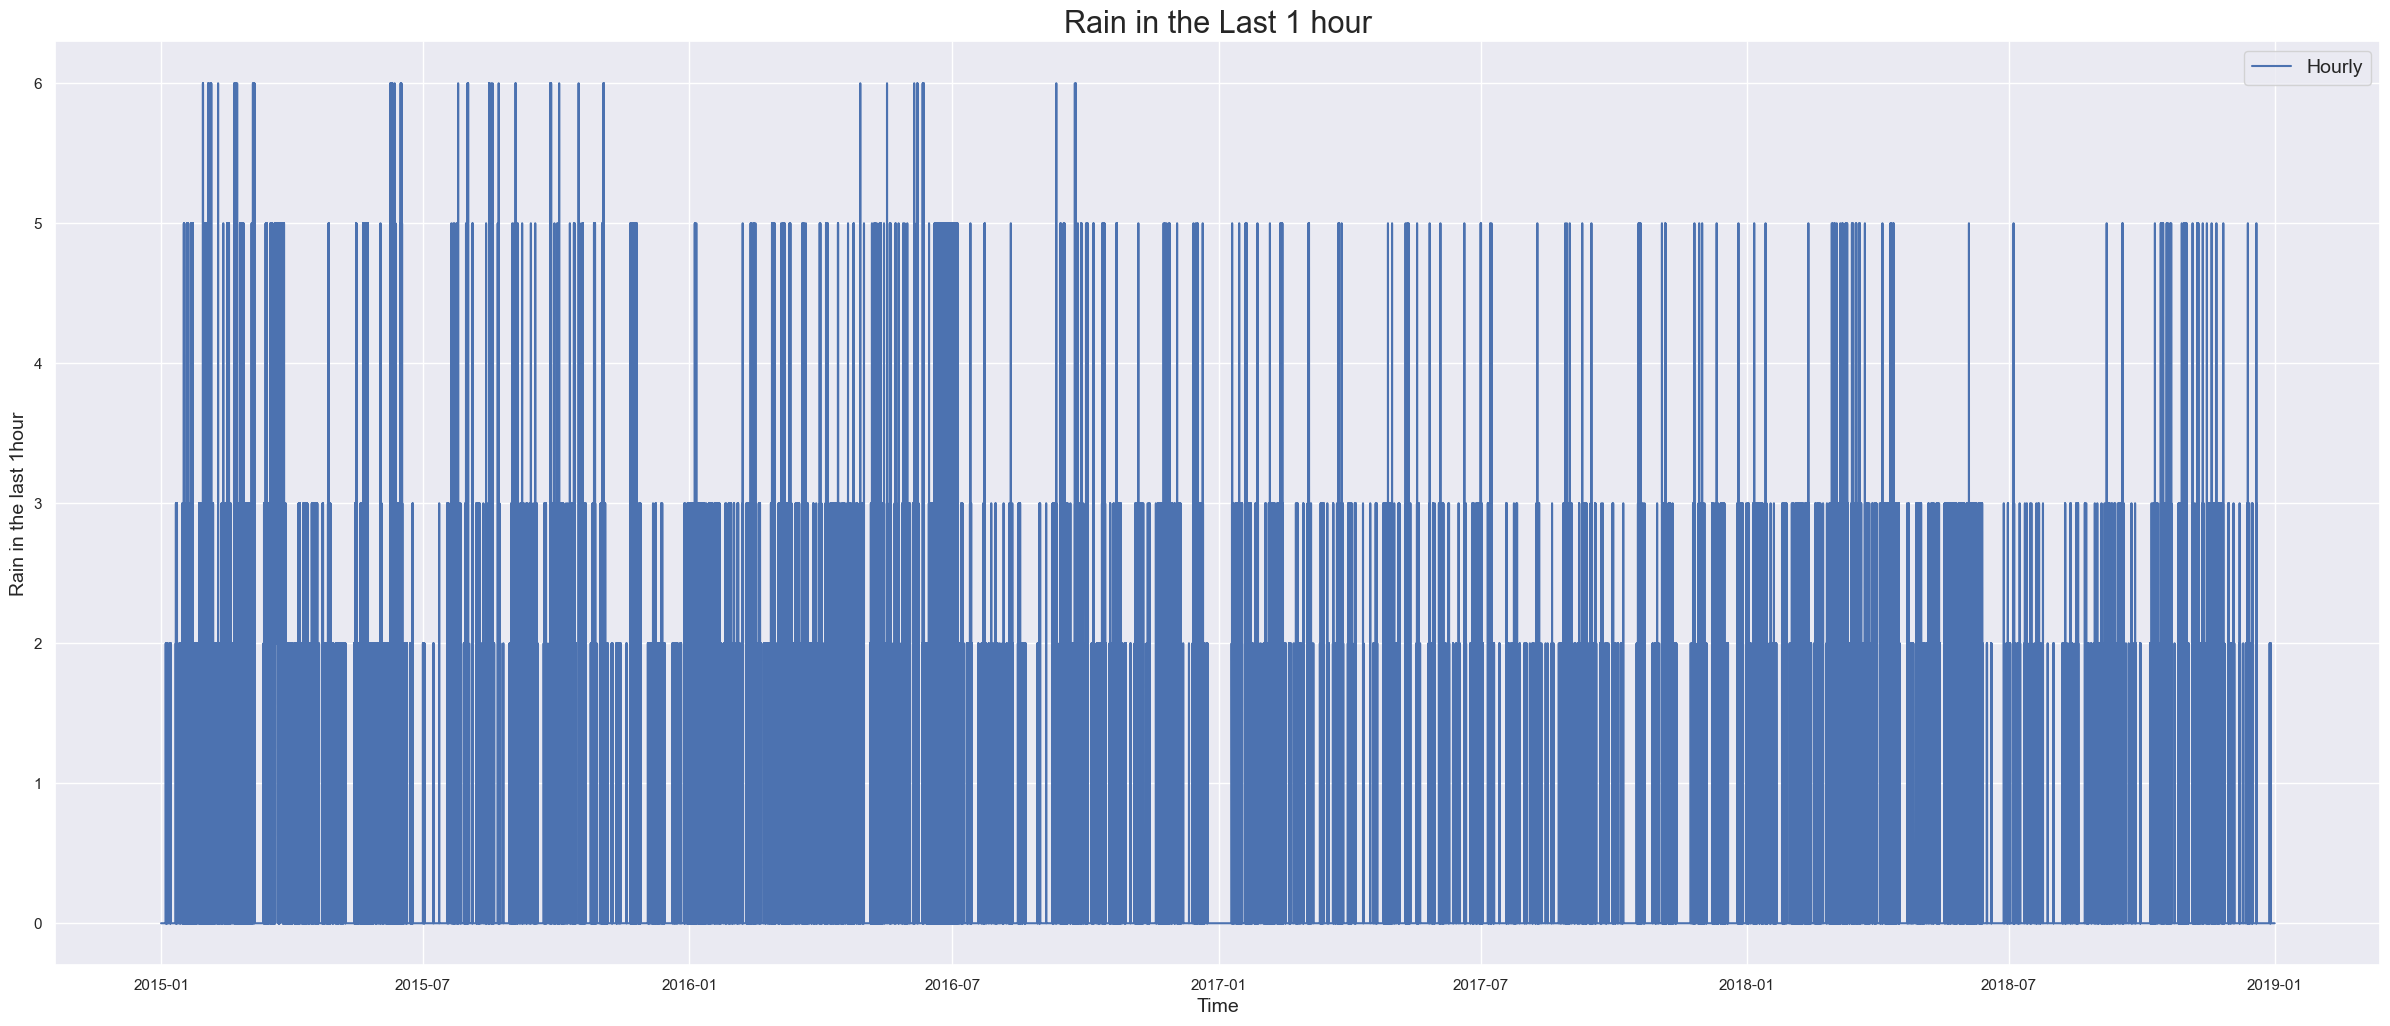

In [200]:
# plotting the final_df (rain_1h)

hour_rain = time_series(final_df, 'rain_1h', ylabel = 'Rain in the last 1hour',
                 title = 'Rain in the Last 1 hour', label = 'Hourly' )

plt.show()

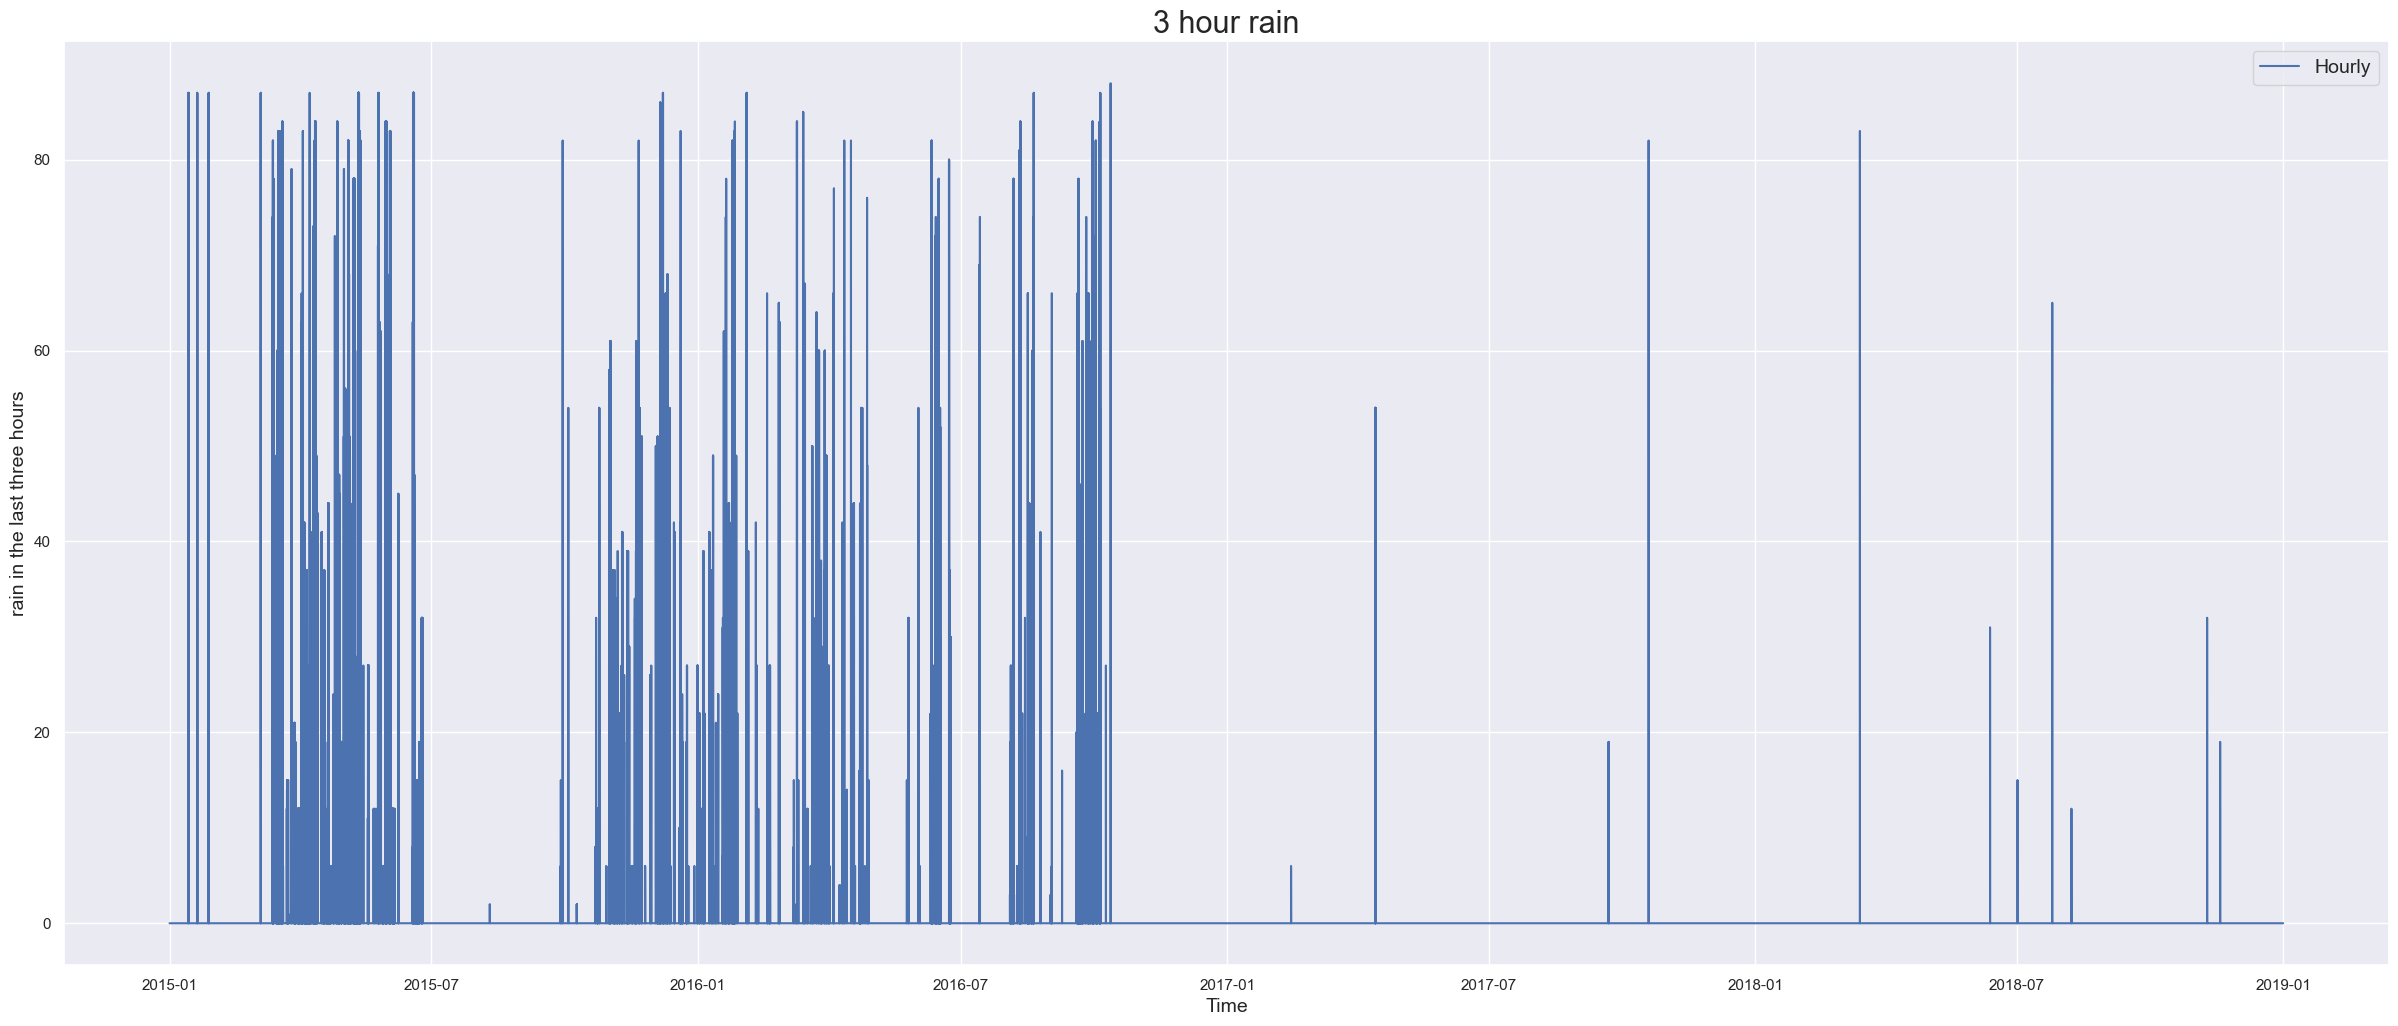

In [201]:
Thour_rain = time_series(final_df, 'rain_3h', ylabel = 'rain in the last three hours',
                        label = 'Hourly', title = '3 hour rain'
                        )

plt.show()

from the above two observation, we can drop 'rain_3h' cause it doesnt show much and remain with 'rain_1h' 

In [202]:
# checking the firstv 15 rows of the following columns

temp_final = final_df.columns[28::]

temp_finals = final_df.iloc[:15:][temp_final]
temp_finals

,rain_1h,rain_3h,snow_3h,clouds_all
Time,,,,
2014-12-31 23:00:00+00:00,0,0,0,0
2014-12-31 23:00:00+00:00,0,0,0,0
2014-12-31 23:00:00+00:00,0,0,0,0
2014-12-31 23:00:00+00:00,0,0,0,0
2014-12-31 23:00:00+00:00,0,0,0,0
2015-01-01 00:00:00+00:00,0,0,0,0
2015-01-01 00:00:00+00:00,0,0,0,0
2015-01-01 00:00:00+00:00,0,0,0,0
2015-01-01 00:00:00+00:00,0,0,0,0


In [203]:

final_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
Time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,170,167,78,76,1,62,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,30,26,48,62,1,309,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,117,113,113,96,0,226,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,4900,4889,112,99,7,58,0,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,518,514,116,74,1,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,2332,3696,106,74,2,300,0,0,0,0
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,951,943,108,73,1,360,0,0,0,0
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,951,1269,111,92,2,100,0,0,0,0


In [204]:
# dropping the rain_3h column
final_df= final_df.drop(['rain_3h'], axis = 1)
final_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
Time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,240,170,167,78,76,1,62,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,28,30,26,48,62,1,309,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,156,117,113,113,96,0,226,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,5414,4900,4889,112,99,7,58,0,0,0
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,730,518,514,116,74,1,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,3451,2332,3696,106,74,2,300,0,0,0
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,1269,951,943,108,73,1,360,0,0,0
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,1448,951,1269,111,92,2,100,0,0,0


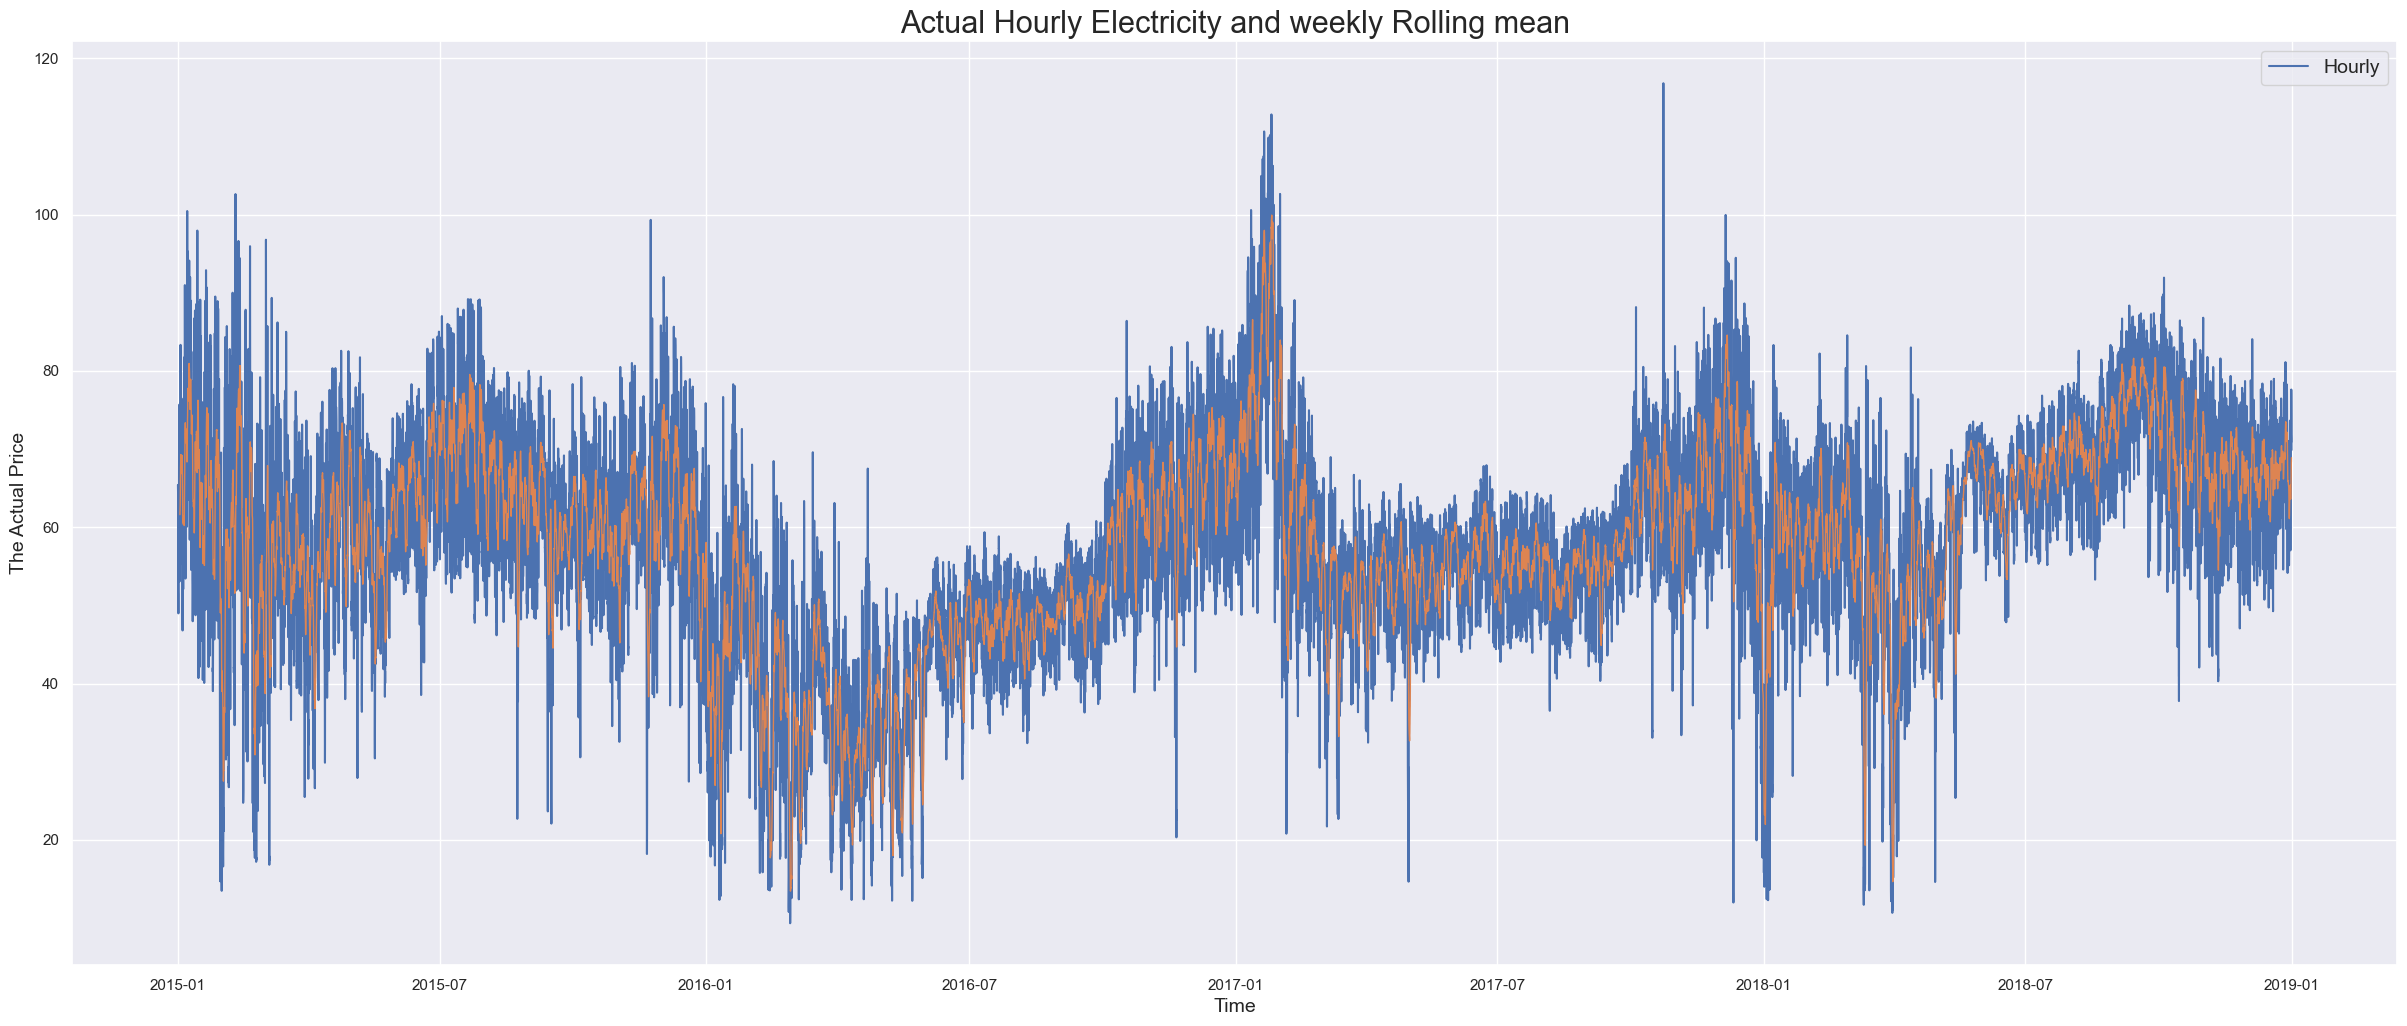

In [205]:
# plotting the hourly actual electricity price, along weekly rolling mean

rolling = final_df['price actual']. rolling(24*7).mean()

ax = time_series(final_df, 'price actual', label = 'Hourly',
                 ylabel = 'The Actual Price', title = 'Actual Hourly Electricity and weekly Rolling mean')


ax.plot(rolling, linestyle = '-', linewidth = 1, label = 'weekly rolling mean')

plt.show()


In [206]:
final_df = final_df.reset_index().drop_duplicates(
    subset = ['Time'], keep = 'first').set_index('Time')

In [207]:
# plotting the electricity price(montly frequency) along with its 1 year lagged series

monthly_price = final_df['price actual'].asfreq('M')
ax = time_series(series = monthly_price, ylabel= 'The Actual Price', 
                 title = 'The Electricity Price(monthly frequency) and 1 year lagged price')
shifted = final_df['price actual'].asfreq('M').shift(12)

ax.plot(shifted, label = 'Hourly')
ax.legend(['The Actual Price', '1-year lagged Actual Price'])
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

In [208]:
final_df.index

DatetimeIndex(['2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
               '2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
               '2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
               '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
               '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
               ...
               '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
               '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
               '2018-12-31 21:00:00+00:00', '2018-12-31 22:00:00+00:00',
               '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00',
               '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Time', length=175320, freq=None)